In [17]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split




geo = "GSE64591"

In [18]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Wozniak2015", silent=True)

In [19]:
data.metadata["platform_id"][0]

'GPL18942'

### Reading in from external source

In [20]:
#table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_normalized.txt", sep="\t", header=7)
table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_non-normalized.txt", sep="\t", header=5)

In [21]:
mirnas = table.iloc[:, 0]
table = table.iloc[:, 1:].transpose()

In [22]:
[m for m in mirnas if "-155" in m]

['hsa-miR-155-002623', 'hsa-miR-155#-002287']

In [23]:
len(mirnas)

768

In [24]:
list(data.gsms.values())[-40].metadata

{'title': ['NSCLC 61'],
 'geo_accession': ['GSM1574969'],
 'status': ['Public on Dec 31 2015'],
 'submission_date': ['Dec 30 2014'],
 'last_update_date': ['Dec 31 2015'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['plasma'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age at interview: 55',
  'smoking status: Ever smoker',
  'morphology (for patients only): 8140/3',
  'disease state: Non-small cell lung cancer patient'],
 'treatment_protocol_ch1': ['Peripheral blood was collected in EDTA tubes at the time of interview.'],
 'growth_protocol_ch1': ['n/a'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from 300ï\xadL of plasma using NucleoSpinÂ® miRNA Plasma kit (Macherey-Nagel, DÃ¼ren, Germany) according to the manufacturerâ€™s protocol with Proteinase K digest, addition of 2Î¼g of glycogen carrier and DNAse digest steps. All samples were spiked-in with 10pmol of Arabidopsi

### T-test

In [25]:
X = table

In [26]:
X_healthy, X_cancer = X[:100], X[100:]

In [27]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [28]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [29]:
mirnas[lowest], pvalues

(591    hsa-miR-340#-002259
 121    hsa-miR-200c-002300
 106     hsa-miR-191-002299
 58      hsa-miR-126-002228
 190      hsa-let-7b-002619
 Name: ID_REF, dtype: object,
 array([5.37744921e-06, 9.92183430e-06, 2.32982318e-05, 3.12034727e-05,
        3.36242947e-05]))

### F-test

In [30]:
t3 = table

In [31]:
f, p = f_classif(t3, 100*[0] + 100*[1])

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [248 278 344 460 461 474 479 497 514 563 573 574 575 618 623 625 629 631
 643 646 672 674 686 747 761 762] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### ANOVA

In [32]:
t3

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
CRTL 1,26.422,35.279,30.846,31.054,30.867,24.499,20.429,22.118,29.446,30.972,...,40.000,27.992,22.692,40.0,40.0,28.440,40.000,28.897,25.646,19.190
CRTL 2,28.967,34.915,32.807,32.266,28.442,26.992,24.904,24.215,29.930,34.407,...,40.000,28.339,40.000,40.0,40.0,28.179,40.000,29.744,27.101,36.475
CRTL 3,29.565,31.084,31.726,31.778,30.171,26.232,21.014,22.370,29.688,31.244,...,40.000,26.837,29.079,40.0,40.0,26.888,40.000,25.946,24.137,20.107
CRTL 4,23.395,30.185,30.117,30.131,29.829,23.148,21.463,21.168,28.267,29.289,...,22.917,27.755,28.367,40.0,40.0,27.480,33.336,27.307,25.629,32.897
CRTL 5,40.000,40.000,31.255,32.312,40.000,31.177,24.590,25.456,34.951,40.000,...,40.000,37.126,40.000,40.0,40.0,26.640,40.000,21.958,26.579,40.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NSCLC 96,31.903,40.000,33.290,32.489,36.312,27.493,24.327,25.134,32.910,40.000,...,39.643,28.476,33.000,40.0,40.0,27.321,40.000,29.344,27.745,33.230
NSCLC 97,28.019,40.000,30.399,30.159,40.000,25.604,22.389,22.919,30.275,33.870,...,40.000,27.671,40.000,40.0,40.0,27.346,40.000,23.920,26.313,20.022
NSCLC 98,22.790,28.738,27.797,27.998,26.939,22.233,18.187,18.527,24.147,25.640,...,23.781,40.000,6.284,40.0,40.0,28.510,32.195,24.670,21.605,29.168
NSCLC 99,30.293,40.000,32.229,33.748,29.851,26.102,21.429,22.059,28.040,31.723,...,40.000,27.757,40.000,40.0,40.0,28.455,40.000,29.631,27.297,18.898


In [33]:
X = np.array(100*[0] + 100*[1]).reshape(-1, 1)

In [34]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [35]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted, multioutput="variance_weighted")

0.008153505435840074

### Mean-variance-plot

In [36]:
np.mean(table)

0      29.183745
1      35.294295
2      31.074000
3      31.153310
4      33.186415
         ...    
763    27.955345
764    39.387195
765    27.473235
766    24.524425
767    22.706135
Length: 768, dtype: float64

In [37]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [38]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

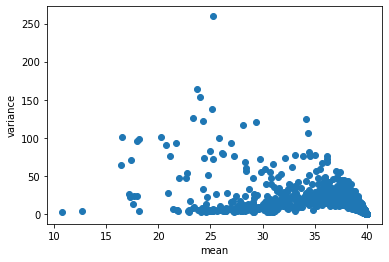

In [39]:
mean_variance_plot(table)

In [40]:
norm_log_table = table #- np.mean(table)

In [41]:
#norm_log_table /= np.sqrt(np.mean(np.var(table, ddof=1)))

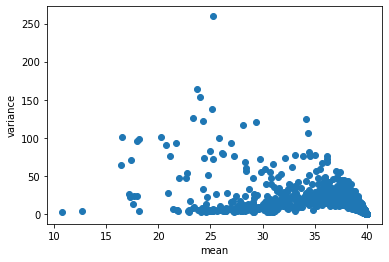

In [42]:
mean_variance_plot(norm_log_table)

### PCA

In [43]:
pca = decomposition.PCA(n_components=10)

In [44]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [45]:
pca.explained_variance_ratio_

array([0.13781371, 0.08099746, 0.0544605 , 0.03061048, 0.01944033,
       0.01827839, 0.01735844, 0.01657279, 0.01572385, 0.01475912])

In [46]:
components = pca.transform(norm_log_table)

In [47]:
components

array([[ -0.83371574,  -4.52129431, -35.55870019, ...,   4.62091773,
        -13.58517541,  -8.78393493],
       [-13.81016671,   1.58982484,   4.95743968, ...,  26.44450358,
         20.70430192, -34.46232229],
       [ 16.79729152,   0.69280708, -37.6279903 , ...,  -4.96077164,
        -37.28848837,  -7.15917056],
       ...,
       [ 76.44193868,  44.97289672, -26.71086976, ...,  12.56129127,
        -24.24205657,   5.92935371],
       [-32.55614822,  32.9739496 ,  19.4486478 , ...,  10.69684522,
         29.63530411,  11.82204219],
       [-47.69457868,  27.87056467,  14.15544253, ..., -11.71554875,
        -11.68436467,   2.3806825 ]])

In [48]:
list(data.gsms.values())[100].metadata

{'title': ['NSCLC 1'],
 'geo_accession': ['GSM1574909'],
 'status': ['Public on Dec 31 2015'],
 'submission_date': ['Dec 30 2014'],
 'last_update_date': ['Dec 31 2015'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['plasma'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age at interview: 68',
  'smoking status: Ever smoker',
  'morphology (for patients only): 8070/3',
  'disease state: Non-small cell lung cancer patient'],
 'treatment_protocol_ch1': ['Peripheral blood was collected in EDTA tubes at the time of interview.'],
 'growth_protocol_ch1': ['n/a'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from 300ï\xadL of plasma using NucleoSpinÂ® miRNA Plasma kit (Macherey-Nagel, DÃ¼ren, Germany) according to the manufacturerâ€™s protocol with Proteinase K digest, addition of 2Î¼g of glycogen carrier and DNAse digest steps. All samples were spiked-in with 10pmol of Arabidopsis

In [49]:
controls = np.array(["CRTL" in k.metadata["title"][0] for k in list(data.gsms.values())])

In [50]:
sum(controls)

100

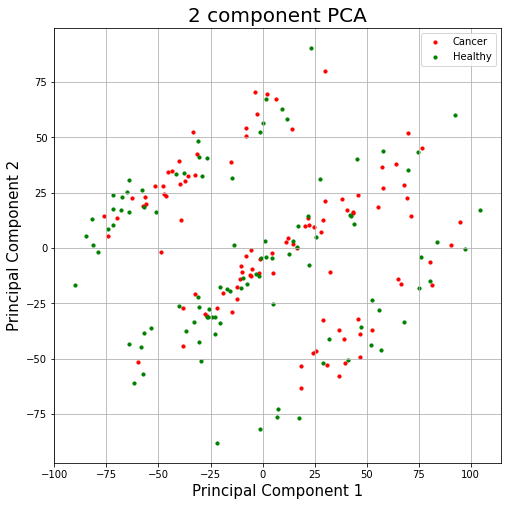

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [52]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

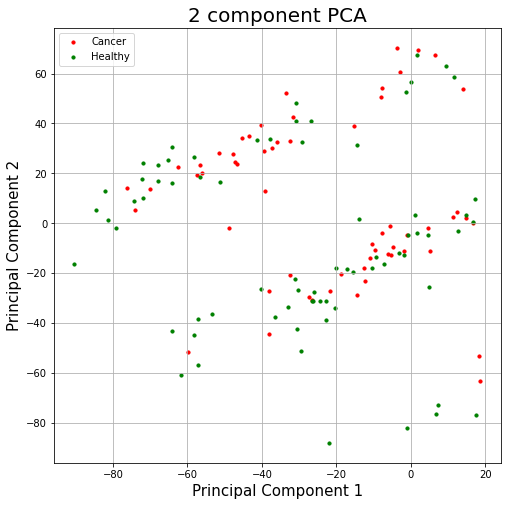

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [54]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(": ")[1].replace("NA", "NaN")) for k in list(data.gsms.values())])
smoke = np.array(["Ever" in k.metadata["characteristics_ch1"][2] for k in list(data.gsms.values())])

In [55]:
covars = pd.DataFrame(np.array([sex, age, smoke]).transpose(), columns=["sex", "age", "smoke"])

In [56]:
covars = covars.fillna(covars.mean())

In [57]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [58]:
adj_norm_log_table = norm_log_table #- linreg.predict(covars)

# PCA

In [59]:
pca = decomposition.PCA(n_components=10)

In [60]:
pca.fit(adj_norm_log_table)

PCA(n_components=10)

In [61]:
components = pca.transform(adj_norm_log_table)

In [62]:
components

array([[ -0.83371574,  -4.52129254, -35.55869032, ...,   4.65787484,
        -13.53922473,  -8.91984049],
       [-13.81016672,   1.58983021,   4.95753791, ...,  26.52080488,
         21.0218022 , -34.75510089],
       [ 16.79729149,   0.69280114, -37.62796643, ...,  -4.84054358,
        -37.63847107,  -6.74999642],
       ...,
       [ 76.4419387 ,  44.97289977, -26.7109161 , ...,  12.78631847,
        -25.14560514,   5.77316889],
       [-32.55614822,  32.9739496 ,  19.44865971, ...,  10.54136514,
         29.86456456,  11.70257205],
       [-47.6945787 ,  27.87056382,  14.15549025, ..., -11.37126822,
        -11.09713899,   1.7353752 ]])

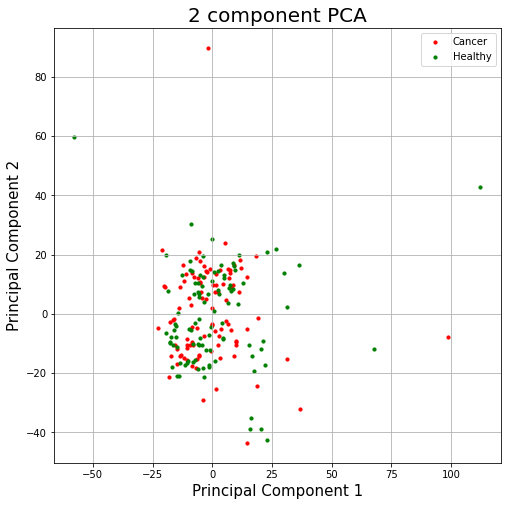

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 4], components[controls == False, 5], c = 'r', s = 10)
ax.scatter(components[controls == True, 4], components[controls == True, 5], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [65]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


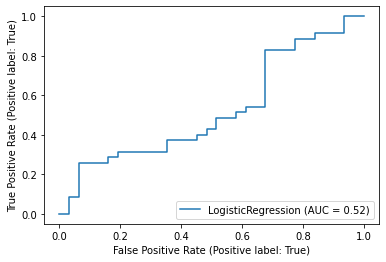

In [66]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [67]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [68]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[20:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


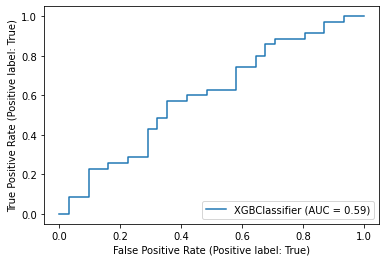

In [69]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [70]:
lookup_table = pd.read_csv("../Others/taqman.csv", index_col=2)
lookup_table.head()

,Well Number,Well Name,Assay Name,Control Assay,Assay Target Sequence,miRBase ID (v22),miRBase Alias
Assay ID,,,,,,,
377,1,A1,hsa-let-7a,NaN,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-5p,hsa-let-7a(17)
379,2,A2,hsa-let-7c,NaN,UGAGGUAGUAGGUUGUAUGGUU,hsa-let-7c-5p,hsa-let-7c(19)
2283,3,A3,hsa-let-7d,NaN,AGAGGUAGUAGGUUGCAUAGUU,hsa-let-7d-5p,hsa-let-7d(17)
2406,4,A4,hsa-let-7e,NaN,UGAGGUAGGAGGUUGUAUAGUU,hsa-let-7e-5p,hsa-let-7e(17)
382,5,A5,hsa-let-7f,NaN,UGAGGUAGUAGAUUGUAUAGUU,hsa-let-7f-5p,hsa-let-7f(17)


In [71]:
lookup_table = lookup_table.drop_duplicates("Assay Target Sequence")

In [72]:
len(lookup_table)

758

In [73]:
mirnas[:10]

0     hsa-let-7a-000377
1    hsa-miR-10b-002218
2        U6snRNA-001973
3        U6snRNA-001973
4    hsa-miR-15a-000389
5    hsa-miR-15b-000390
6     hsa-miR-16-000391
7     hsa-miR-17-002308
8    hsa-miR-18a-002422
9    hsa-miR-18b-002217
Name: ID_REF, dtype: object

In [74]:
mirnas = [int(m[-6:]) for m in mirnas]
mirnas[:10]

[377, 2218, 1973, 1973, 389, 390, 391, 2308, 2422, 2217]

In [75]:
sequences = lookup_table.loc[mirnas]["Assay Target Sequence"]

In [76]:
len(mirnas)

768

In [77]:
len(sequences)

768

In [78]:
adj_norm_log_table.columns = sequences
adj_norm_log_table *= -1
adj_norm_log_table = adj_norm_log_table.loc[:,~adj_norm_log_table.columns.duplicated()]
adj_norm_log_table["cancer"] = 1 - controls
adj_norm_log_table.head()

C:\Users\olefr\AppData\Local\Temp/ipykernel_2908/3781353790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_norm_log_table["cancer"] = 1 - controls


Assay Target Sequence,UGAGGUAGUAGGUUGUAUAGUU,UACCCUGUAGAACCGAAUUUGUG,GUGCUCGCUUCGGCAGCACAUAUACUAAAAUUGGAACGAUACAGAGAAGAUUAGCAUGGCCCCUGCGCAAGGAUGACACGCAAAUUCGUGAAGCGUUCCAUAUUUU,UAGCAGCACAUAAUGGUUUGUG,UAGCAGCACAUCAUGGUUUACA,UAGCAGCACGUAAAUAUUGGCG,CAAAGUGCUUACAGUGCAGGUAG,UAAGGUGCAUCUAGUGCAGAUAG,UAAGGUGCAUCUAGUGCAGUUAG,UGUGCAAAUCUAUGCAAAACUGA,...,UCCAGUGCCCUCCUCUCC,UUAGGGCCCUGGCUCCAUCUCC,UGUUCAUGUAGAUGUUUAAGC,AAAACUGUAAUUACUUUUGUAC,UCACUGUUCAGACAGGCGGA,AAAAACUGAGACUACUUUUGCA,GUCCCUGUUCAGGCGCCA,UCCCUGUUCGGGCGCCA,CCUGUUGAAGUGUAAUCCCCA,cancer
CRTL 1,-26.422,-35.279,-30.846,-30.867,-24.499,-20.429,-22.118,-29.446,-30.972,-25.006,...,-27.992,-22.692,-40.0,-40.0,-28.440,-40.000,-28.897,-25.646,-19.190,0
CRTL 2,-28.967,-34.915,-32.807,-28.442,-26.992,-24.904,-24.215,-29.930,-34.407,-38.499,...,-28.339,-40.000,-40.0,-40.0,-28.179,-40.000,-29.744,-27.101,-36.475,0
CRTL 3,-29.565,-31.084,-31.726,-30.171,-26.232,-21.014,-22.370,-29.688,-31.244,-24.795,...,-26.837,-29.079,-40.0,-40.0,-26.888,-40.000,-25.946,-24.137,-20.107,0
CRTL 4,-23.395,-30.185,-30.117,-29.829,-23.148,-21.463,-21.168,-28.267,-29.289,-24.962,...,-27.755,-28.367,-40.0,-40.0,-27.480,-33.336,-27.307,-25.629,-32.897,0
CRTL 5,-40.000,-40.000,-31.255,-40.000,-31.177,-24.590,-25.456,-34.951,-40.000,-28.233,...,-37.126,-40.000,-40.0,-40.0,-26.640,-40.000,-21.958,-26.579,-40.000,0


In [79]:
adj_norm_log_table.to_csv("../TransformedData/Wozniak2015_raw.csv", index=False)